# <center>**Titanic Competition**</center>

Esse notebook em como intuito de mostrar como eu fiz para treinar o dados sobre os sobreviventes e não sobrevivetes no desastre do Titanic. Ao longo desse notebook irei mostrar como eu fiz a limpagem dos dados, ou seja, o Pre-processamento dos dados, e tammbém será mostrado com eu treiei alguns modelos de Classificação.

Aqui em baixo está o link para quem tiver interesse nos dados que baixei, é um link do site do Kaggle:
* Link - https://www.kaggle.com/c/titanic

## **1. Importação e analise dos dados**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando os dados #

data = pd.read_csv('train.csv')

### **1.1 Informações sobre os dados**

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **1.2 Matrix de correlação dos dados**

Por Default foi-se utilizado a correlação de Pearson

In [6]:
# Matriz de correlação#
corr = data.corr()

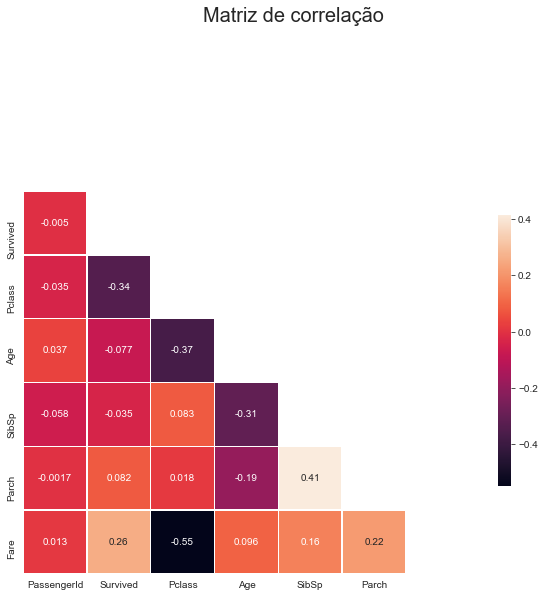

In [9]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(10,10))

labelsx = ['PassengerId', 'Survived', 	'Pclass', 	'Age' 	,'SibSp' 	,'Parch' 	,'']
labelsy = ['', 'Survived', 	'Pclass', 	'Age' 	,'SibSp' 	,'Parch' 	,'Fare']

mask = np.triu(np.ones_like(corr, dtype=bool))
plot = sns.heatmap(corr, mask=mask, square=True, annot = True, linewidths=.5, cbar_kws={"shrink": .5},
                xticklabels = labelsx, yticklabels = labelsy)

plt.suptitle("Matriz de correlação", size = 20)
plot = plot.get_figure() 
plot.savefig('1.png')

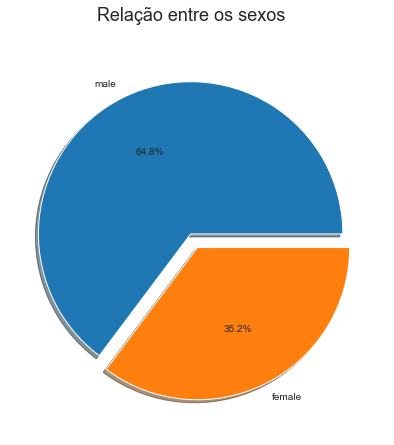

In [12]:
sex = data['Sex'].value_counts()

sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(7, 7), sharex=True)

labels = sex.index
explode = (0.1, 0)

# Criando o rafico pizza #
plot = plt.pie(x = sex, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True)

plt.suptitle('Relação entre os sexos', size = 18)

plt.savefig('2.png')

Text(0, 0.5, 'Quantidade')

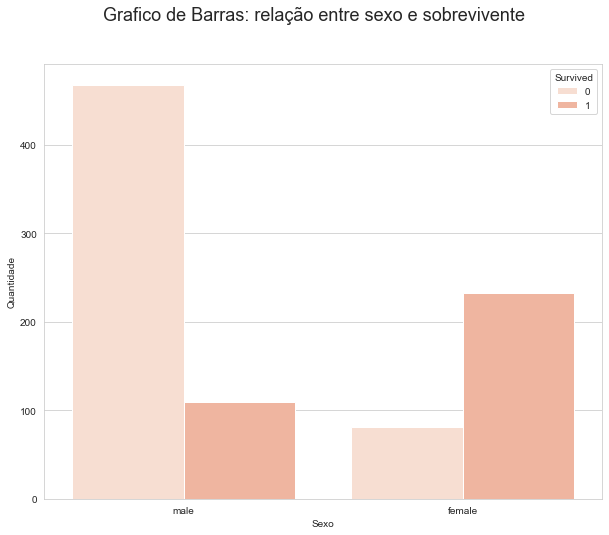

In [9]:
sns.set_palette("Reds")
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(10, 8), sharex=True)

sns.countplot(data=data, x = 'Sex', hue = 'Survived')

plt.suptitle("Grafico de Barras: relação entre sexo e sobrevivente", size = 18)
plt.xlabel('Sexo')
plt.ylabel("Quantidade")

Text(0, 0.5, 'Quantidade')

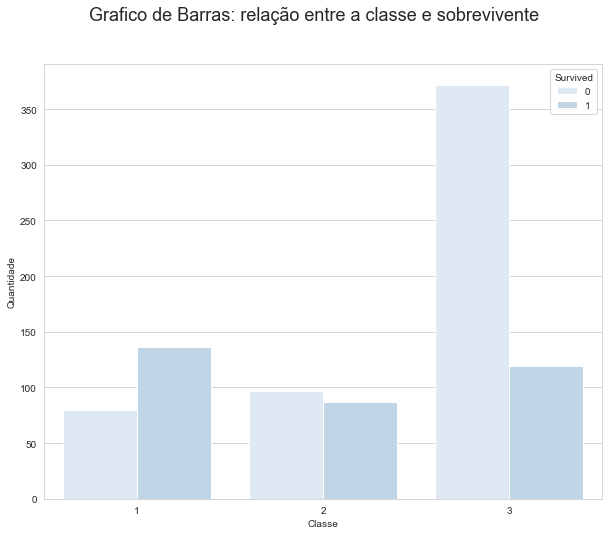

In [10]:
sns.set_palette("Blues")
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(10, 8), sharex=True)

sns.countplot(data=data, x = 'Pclass', hue = 'Survived')

plt.suptitle("Grafico de Barras: relação entre a classe e sobrevivente", size = 18)
plt.xlabel('Classe')
plt.ylabel("Quantidade")

Text(0, 0.5, 'Quantidade')

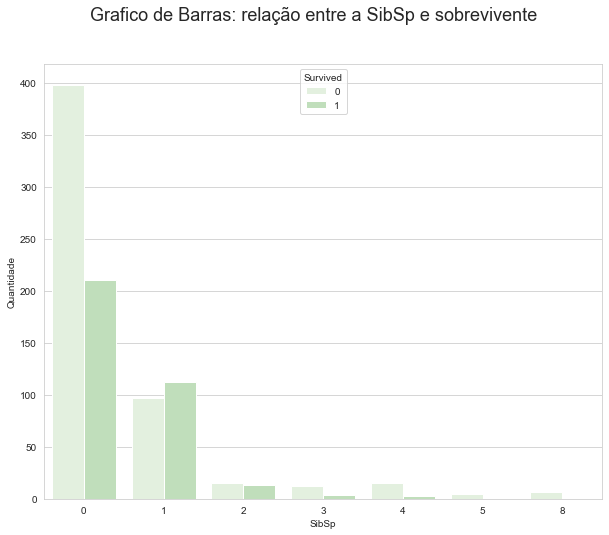

In [11]:
sns.set_palette("Greens")
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(10, 8), sharex=True)

sns.countplot(data=data, x = 'SibSp', hue = 'Survived')

plt.suptitle("Grafico de Barras: relação entre a SibSp e sobrevivente", size = 18)
plt.xlabel('SibSp')
plt.ylabel("Quantidade")

Text(0, 0.5, 'Fare/Tarifa')

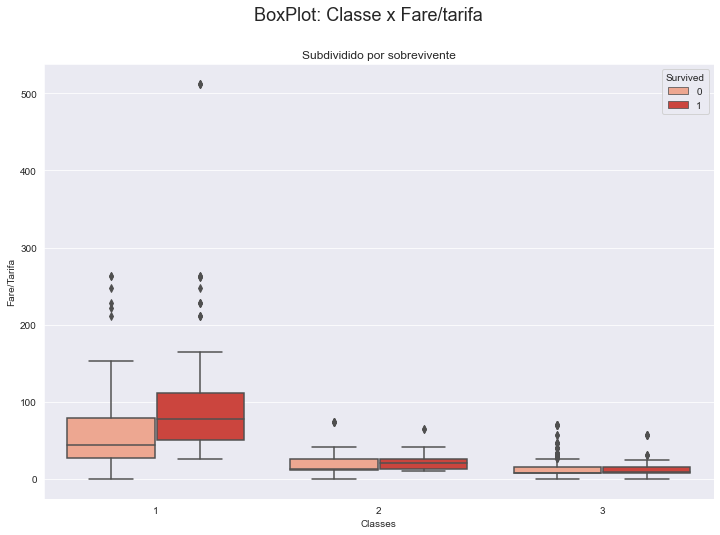

In [12]:
sns.set_style("darkgrid")

f, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=data, y='Fare', x = 'Pclass', hue = 'Survived', palette = 'Reds')

plt.suptitle("BoxPlot: Classe x Fare/tarifa", size = 18)
plt.title("Subdividido por sobrevivente")
plt.xlabel('Classes')
plt.ylabel("Fare/Tarifa")

#  **2. Pré-Processamento** 

## **2.1 Redução da Dimensão**

In [13]:
# Na verdade isso aqui nem 'reduçã de dimensão' pois não estou usando PCA ou afins #
data = data.drop(columns=['Cabin'])

## **2.2 Lidando com os dados faltantes**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
data['Age'][data['Age'].isnull() == True] = data['Age'].median()

<ipython-input-15-0b12bcb556be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][data['Age'].isnull() == True] = data['Age'].median()


In [16]:
data = data.dropna()

## **2.3 One HotEncoding**

Aqui iremos transformar os dados categoricos

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
labels1 = ['Pclass', 'Age', 'Parch', 'Fare', 'SibSp']
labels2 = ['Sex']

In [20]:
x_num = data[labels1]
x_cat = data[labels2]
y_train = data['Survived']

In [21]:
enc = OneHotEncoder(handle_unknown='ignore')
x_cat = enc.fit_transform(x_cat).toarray()
enc.categories_

[array(['female', 'male'], dtype=object)]

In [22]:
print(x_cat.shape,
x_num.shape)

(889, 2) (889, 5)


In [23]:
x_cat = pd.DataFrame(data=x_cat)
x_num = x_num.reset_index()
x_num = x_num.iloc[:, 1:]

x_train = pd.concat([x_num, x_cat], axis = 1)

print(x_train.shape)
x_train.head()

(889, 7)


,Pclass,Age,Parch,Fare,SibSp,0,1
0,3,22.0,0,7.2500,1,0.0,1.0
1,1,38.0,0,71.2833,1,1.0,0.0
2,3,26.0,0,7.9250,0,1.0,0.0
3,1,35.0,0,53.1000,1,1.0,0.0
4,3,35.0,0,8.0500,0,0.0,1.0


In [24]:
x_cat.index

RangeIndex(start=0, stop=889, step=1)

In [25]:
x_num.index

RangeIndex(start=0, stop=889, step=1)

## **2.4 Normalizando**

In [26]:
from sklearn.preprocessing import normalize

In [27]:
x_train = normalize(x_train)

In [28]:
x_train

array([[0.12820484, 0.94016879, 0.        , ..., 0.04273495, 0.        ,
        0.04273495],
       [0.01237655, 0.47030896, 0.        , ..., 0.01237655, 0.01237655,
        0.        ],
       [0.10963184, 0.95014262, 0.        , ..., 0.        , 0.03654395,
        0.        ],
       ...,
       [0.08168287, 0.76237343, 0.05445524, ..., 0.02722762, 0.02722762,
        0.        ],
       [0.02517367, 0.65451537, 0.        , ..., 0.        , 0.        ,
        0.02517367],
       [0.09069852, 0.96745085, 0.        , ..., 0.        , 0.        ,
        0.03023284]])

## **2.5 Dividindos em conjunto de treino, teste e validação**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_train ,y_train , test_size=0.25, random_state=42)

In [31]:
x_test, x_val, y_test, y_val = train_test_split(x_test ,y_test , test_size=0.5, random_state=30)

# **3. Criação do Modelo**

Será criado três tipos de modelos diferentes

## **3.1 Support Vector Machine model**

### **3.1.1 Sem Grid Search**

In [32]:
from sklearn import svm

In [33]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [34]:
y_pred = clf.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score

In [36]:
print('Acurracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Acurracy:  0.6846846846846847
Recall:  0.4888888888888889
Precision:  0.6470588235294118


array([[54, 12],
       [23, 22]], dtype=int64)

### **3.1.2 Com Grid Search**

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
              'gamma':[1, 0.5, 2, 3, 4],
              'degree':[2, 4, 6, 9]}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)

In [39]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [2, 4, 6, 9], 'gamma': [1, 0.5, 2, 3, 4],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [40]:
y_pred = clf.predict(x_test)

In [41]:
print('Acurracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Acurracy:  0.8198198198198198
Recall:  0.7555555555555555
Precision:  0.7906976744186046


array([[57,  9],
       [11, 34]], dtype=int64)

## **3.2 Decision Tree Model**

### **3.2.1 Sem Grid Search**

In [42]:
from sklearn import tree

In [43]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = clf.predict(x_test)

In [45]:
print('Acurracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Acurracy:  0.7837837837837838
Recall:  0.7333333333333333
Precision:  0.7333333333333333


array([[54, 12],
       [12, 33]], dtype=int64)

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cross_val_score(clf, x_val, y_val, cv=15)

array([0.75      , 0.875     , 0.5       , 1.        , 0.875     ,
       0.625     , 0.75      , 0.57142857, 0.71428571, 0.71428571,
       0.85714286, 0.85714286, 0.85714286, 0.57142857, 0.57142857])

### **3.2.2 Com Grid Search**

In [48]:
parameters = {'criterion':('gini', 'entropy'),
              'max_depth':[1, 3, 5, 10, 15, 20, 25, 30],
              'splitter':('best', 'random')}

treer = tree.DecisionTreeClassifier()
clf = GridSearchCV(treer, parameters)

In [49]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 3, 5, 10, 15, 20, 25, 30],
                         'splitter': ('best', 'random')})

In [50]:
y_pred = clf.predict(x_test)

In [51]:
print('Acurracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Acurracy:  0.7387387387387387
Recall:  0.7111111111111111
Precision:  0.6666666666666666


array([[50, 16],
       [13, 32]], dtype=int64)

In [52]:
cross_val_score(clf, x_val, y_val, cv=15)

array([0.75      , 1.        , 0.625     , 0.875     , 0.625     ,
       0.75      , 0.75      , 0.71428571, 0.57142857, 0.71428571,
       0.71428571, 0.71428571, 1.        , 0.57142857, 0.57142857])

## **3.3 Logictic Regression Model**

### **3.3.1 Sem Grid Search**

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [55]:
y_pred = clf.predict(x_test)

In [56]:
print('Acurracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Acurracy:  0.6756756756756757
Recall:  0.4888888888888889
Precision:  0.6285714285714286


array([[53, 13],
       [23, 22]], dtype=int64)

In [57]:
cross_val_score(clf, x_val, y_val, cv=15)

array([0.875     , 0.625     , 0.5       , 0.875     , 0.875     ,
       0.625     , 0.75      , 0.71428571, 0.71428571, 0.71428571,
       0.85714286, 0.85714286, 0.85714286, 0.71428571, 0.57142857])

### **3.3.2 Com Grid Search**

In [58]:
parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              'max_iter':[200, 300, 500, 1000]}

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf = GridSearchCV(clf, parameters)

In [59]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'max_iter': [200, 300, 500, 1000],
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')})

In [60]:
y_pred = clf.predict(x_test)

In [61]:
print('Acurracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Acurracy:  0.6756756756756757
Recall:  0.4888888888888889
Precision:  0.6285714285714286


array([[53, 13],
       [23, 22]], dtype=int64)

In [62]:
cross_val_score(clf, x_val, y_val, cv=15)

array([0.875     , 0.625     , 0.5       , 0.875     , 0.875     ,
       0.625     , 0.75      , 0.71428571, 0.71428571, 0.71428571,
       0.85714286, 0.85714286, 0.85714286, 0.71428571, 0.57142857])

## **3.4 Random Forest**

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [64]:
parameters = {'n_estimators':[100, 200, 300, 500, 800],
              'criterion':('gini', 'entropy'),
              'max_depth':[1, 3, 5, 10, 15, 20, 25, 30],
              'max_features':('auto', 'sqrt', 'log2')}

forest = RandomForestClassifier()
clf = GridSearchCV(forest, parameters)

In [65]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 3, 5, 10, 15, 20, 25, 30],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': [100, 200, 300, 500, 800]})

In [66]:
y_pred = clf.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [68]:
print('Acurracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Acurracy:  0.8108108108108109
Recall:  0.8
Precision:  0.75


array([[54, 12],
       [ 9, 36]], dtype=int64)

In [ ]:
cross_val_score(clf, x_val, y_val, cv=15)